In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from tqdm.notebook import tqdm

#np.set_printoptions(suppress=True)

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

2024-04-22 11:06:32.542651: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 11:06:32.543698: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 11:06:32.579970: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 11:06:32.706387: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 11:06:33.596522: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [63]:
ang = pd.read_csv('full_data.csv', usecols=['Ang_Pos'])
gaze = pd.read_csv('full_data.csv', usecols=['Gaze.x.', 'Gaze.y.'])

In [104]:
ang_train, ang_test, gaze_train, gaze_test = train_test_split(ang, gaze, test_size=0.33)

ang_train = (ang_train / 360) + 1
ang_test = (ang_test / 360) + 1

ang_train = ang_train.astype(np.float32).to_numpy()
ang_test = ang_test.astype(np.float32).to_numpy()

gaze_train['Gaze.x.'] = gaze_train['Gaze.x.'] / 2560
gaze_train['Gaze.y.'] = gaze_train['Gaze.y.'] / 1080

gaze_test['Gaze.x.'] = gaze_test['Gaze.x.'] / 2560
gaze_test['Gaze.y.'] = gaze_test['Gaze.y.'] / 1080

gaze_train = gaze_train.astype(np.float32).to_numpy()
gaze_test = gaze_test.astype(np.float32).to_numpy()

In [105]:
ang_train

array([[0.6816175 ],
       [0.78692627],
       [0.9869819 ],
       ...,
       [1.0841081 ],
       [0.7493113 ],
       [0.9748783 ]], dtype=float32)

In [89]:
gaze_train

array([[ 0.17979594,  0.4009539 ],
       [ 0.6600215 ,  0.3647639 ],
       [-5.506945  ,  0.18395324],
       ...,
       [ 0.18447457,  0.4272248 ],
       [-0.09138942,  0.41327804],
       [ 0.65775156,  0.42977   ]], dtype=float32)

In [120]:
# Basic feedforward structure
model = keras.Sequential([
    keras.layers.Input((2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile 
model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=[keras.metrics.MeanAbsolutePercentageError()])

# Train
h = model.fit(gaze_train, ang_train, epochs=50, validation_split=0.1)


Epoch 1/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 24.3020 - mean_absolute_percentage_error: 24.3020 - val_loss: 23.3474 - val_mean_absolute_percentage_error: 23.3429
Epoch 2/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 976us/step - loss: 23.0978 - mean_absolute_percentage_error: 23.0978 - val_loss: 23.0357 - val_mean_absolute_percentage_error: 23.0308
Epoch 3/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.8455 - mean_absolute_percentage_error: 22.8455 - val_loss: 22.9454 - val_mean_absolute_percentage_error: 22.9406
Epoch 4/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 996us/step - loss: 22.8616 - mean_absolute_percentage_error: 22.8616 - val_loss: 23.0016 - val_mean_absolute_percentage_error: 22.9955
Epoch 5/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.8823 - mean_absolute_percentage_error: 22.8823 - val_loss: 22.8444 - val_mean_absolute_percentage_error: 22.8389
Epoch 6/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.7720 - mean_absolute_percentage_error: 22

4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.3077 - mean_absolute_percentage_error: 22.3077 - val_loss: 22.4548 - val_mean_absolute_percentage_error: 22.4506
Epoch 40/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.2831 - mean_absolute_percentage_error: 22.2831 - val_loss: 22.3576 - val_mean_absolute_percentage_error: 22.3529
Epoch 41/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 993us/step - loss: 22.3253 - mean_absolute_percentage_error: 22.3253 - val_loss: 22.2484 - val_mean_absolute_percentage_error: 22.2435
Epoch 42/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 995us/step - loss: 22.2741 - mean_absolute_percentage_error: 22.2741 - val_loss: 22.2529 - val_mean_absolute_percentage_error: 22.2480
Epoch 43/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 997us/step - loss: 22.3195 - mean_absolute_percentage_error: 22.3195 - val_loss: 22.4016 - val_mean_absolute_percentage_error: 22.3962
Epoch 44/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 22.3145 - mean_absolute_percentage_error: 22.314

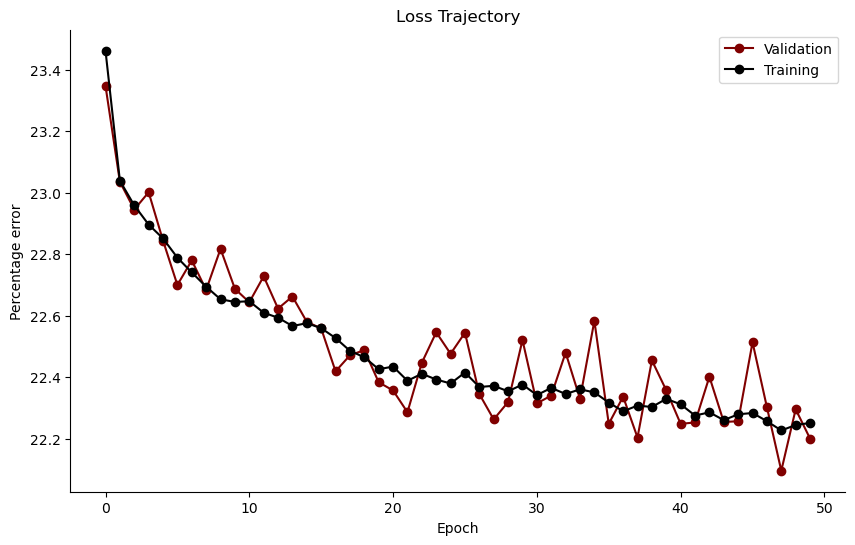

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(50), h.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(50), h.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
ax.set_ylabel('Percentage error')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [124]:
test_loss, test_accuracy = model.evaluate(gaze_test, ang_test)

2240/2240 ━━━━━━━━━━━━━━━━━━━━ 2s 727us/step - loss: 22.1788 - mean_absolute_percentage_error: 22.1788


In [129]:
test_loss, test_accuracy

(22.0529842376709, 22.049562454223633)

In [134]:
# Basic feedforward structure
model2 = keras.Sequential([
    keras.layers.Input((1,)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    
    keras.layers.Dense(2, activation='softmax')
])

# Compile 
model2.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=[keras.metrics.MeanAbsolutePercentageError()])

# Train
j = model2.fit(ang_train, gaze_train, epochs=20, validation_split=0.1)


Epoch 1/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 159.3608 - mean_absolute_percentage_error: 159.3608 - val_loss: 115.9348 - val_mean_absolute_percentage_error: 115.9449
Epoch 2/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 122.6788 - mean_absolute_percentage_error: 122.6788 - val_loss: 154.9944 - val_mean_absolute_percentage_error: 155.0453
Epoch 3/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 132.1546 - mean_absolute_percentage_error: 132.1546 - val_loss: 106.0368 - val_mean_absolute_percentage_error: 106.0792
Epoch 4/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 113.8732 - mean_absolute_percentage_error: 113.8732 - val_loss: 76.9916 - val_mean_absolute_percentage_error: 77.0170
Epoch 5/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 115.9394 - mean_absolute_percentage_error: 115.9394 - val_loss: 63.5529 - val_mean_absolute_percentage_error: 63.5866
Epoch 6/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 113.2560 - mean_absolute_percent

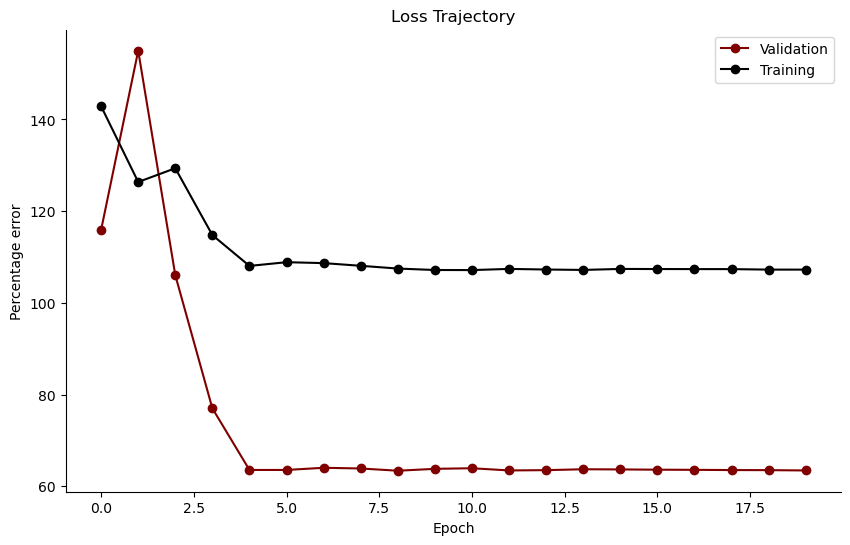

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(20), j.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(20), j.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
ax.set_ylabel('Percentage error')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [136]:
test_loss, test_accuracy = model2.evaluate(ang_test, gaze_test)

2240/2240 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - loss: 82.0181 - mean_absolute_percentage_error: 82.0181


In [137]:
test_loss, test_accuracy

(75.42182922363281, 75.44270324707031)